<a href="https://colab.research.google.com/github/danielramo27s/UDEA-ai4eng-20242/blob/main/99-modelo%20soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargamos el archivo kaggle para obtener acceso a los archivos de la competicion
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielramos27","key":"68ee7434e74c3a6f858f223a903a33a4"}'}

In [2]:
#configuramos el directorio
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

!chmod 600 /content/kaggle.json

In [3]:
#descargamos los archivos de la competicion
!kaggle competitions download -c udea-ai4eng-20242

 84% 17.0M/20.1M [00:00<00:00, 174MB/s]
100% 20.1M/20.1M [00:00<00:00, 183MB/s]


In [4]:
import zipfile

# Descomprime el archivo
with zipfile.ZipFile("/content/udea-ai4eng-20242.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/udea-ai4eng-20242")

In [ ]:
print(os.listdir('/content/udea-ai4eng-20242'))

['test.csv', 'train.csv', 'submission_example.csv']


In [ ]:
import pandas as pd

df = pd.read_csv('/content/udea-ai4eng-20242/train.csv')

# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


None

In [ ]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filtrar solo las columnas con datos faltantes

print(missing_data)

ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
dtype: int64


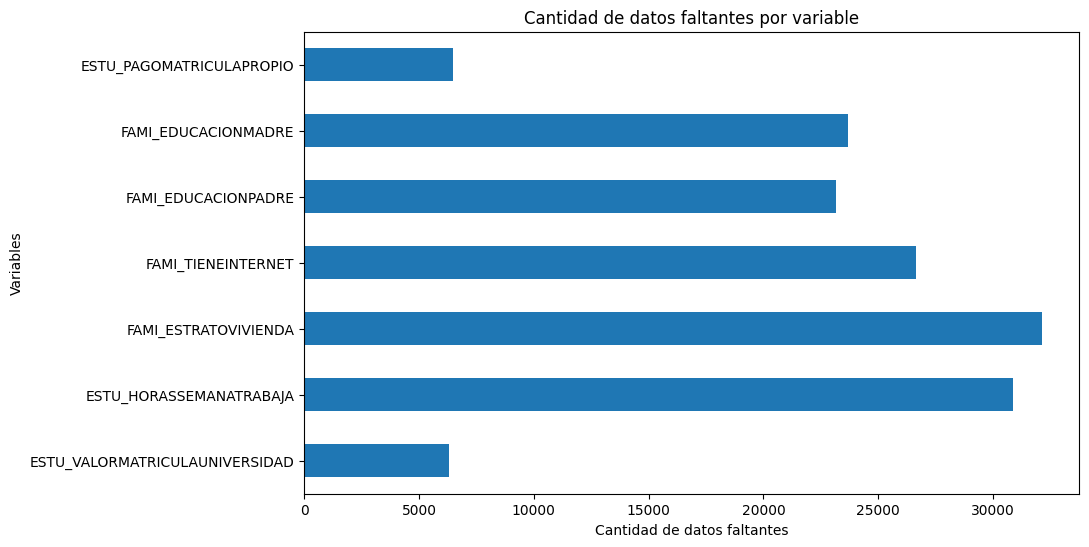

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_data.plot(kind='barh')
plt.title('Cantidad de datos faltantes por variable')
plt.xlabel('Cantidad de datos faltantes')
plt.ylabel('Variables')
plt.show()

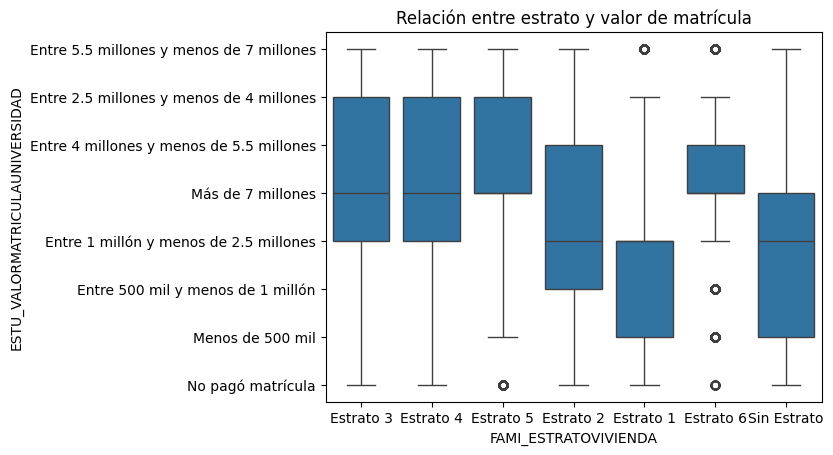

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#relación entre 'FAMI_ESTRATOVIVIENDA' y 'ESTU_VALORMATRICULAUNIVERSIDAD'
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='ESTU_VALORMATRICULAUNIVERSIDAD', data=df)
plt.title('Relación entre estrato y valor de matrícula')
plt.show()

In [ ]:
import pandas as pd

# relación entre 'FAMI_ESTRATOVIVIENDA' y 'ESTU_VALORMATRICULAUNIVERSIDAD'
crosstab = pd.crosstab(df['FAMI_ESTRATOVIVIENDA'], df['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull())
print(crosstab)

ESTU_VALORMATRICULAUNIVERSIDAD   False  True 
FAMI_ESTRATOVIVIENDA                         
Estrato 1                       111576    415
Estrato 2                       231573   1098
Estrato 3                       209203   1482
Estrato 4                        64765    749
Estrato 5                        23249    359
Estrato 6                        12315    290
Sin Estrato                       3126    163


In [ ]:
import pandas as pd

# Crea la tabla de contingencia
crosstab = pd.crosstab(df['ESTU_PAGOMATRICULAPROPIO'], df['ESTU_HORASSEMANATRABAJA'].isnull())

# Imprime la tabla
print(crosstab)

ESTU_HORASSEMANATRABAJA    False  True 
ESTU_PAGOMATRICULAPROPIO               
No                        365956  16245
Si                        290937  12864


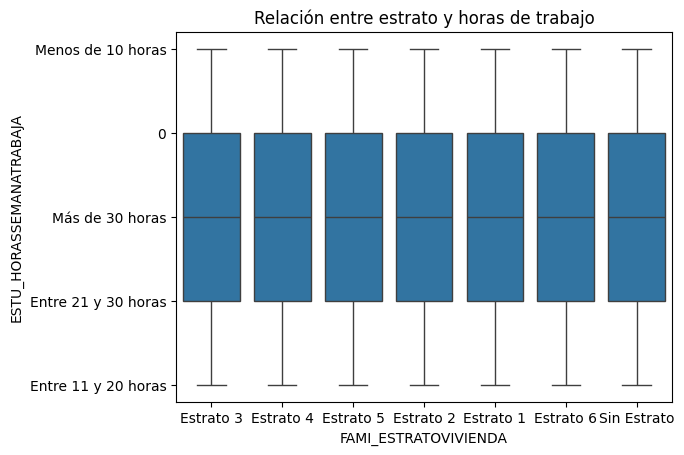

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea el boxplot
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='ESTU_HORASSEMANATRABAJA', data=df)
plt.title('Relación entre estrato y horas de trabajo')
plt.show()

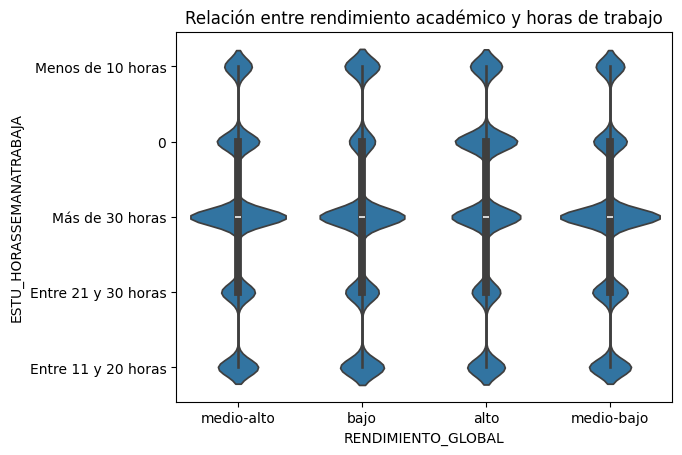

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea el boxplot o gráfico de violín
sns.violinplot(x='RENDIMIENTO_GLOBAL', y='ESTU_HORASSEMANATRABAJA', data=df)
plt.title('Relación entre rendimiento académico y horas de trabajo')
plt.show()

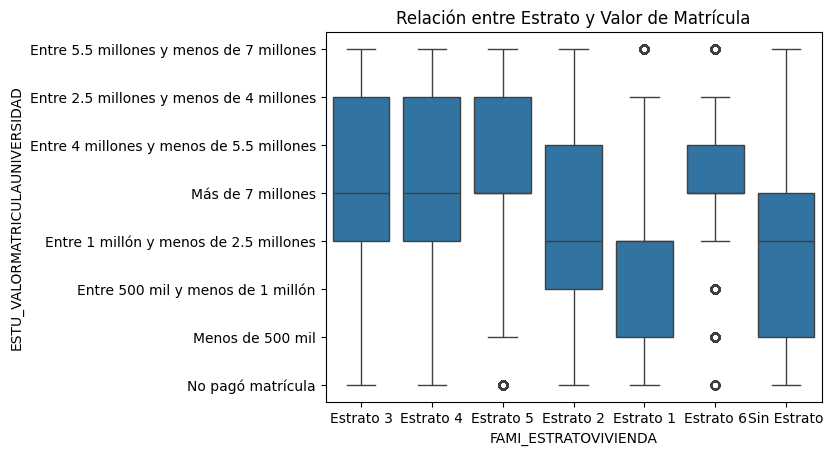

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='ESTU_VALORMATRICULAUNIVERSIDAD', data=df)
plt.title('Relación entre Estrato y Valor de Matrícula')
plt.show()

In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['ESTU_PAGOMATRICULAPROPIO'], df['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull())
print(crosstab)

ESTU_VALORMATRICULAUNIVERSIDAD   False
ESTU_PAGOMATRICULAPROPIO              
No                              382201
Si                              303801


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_TIENEINTERNET'], df['FAMI_ESTRATOVIVIENDA'].isnull())
print(crosstab)

FAMI_ESTRATOVIVIENDA   False  True 
FAMI_TIENEINTERNET                 
No                     72250   1107
Si                    586602   5912


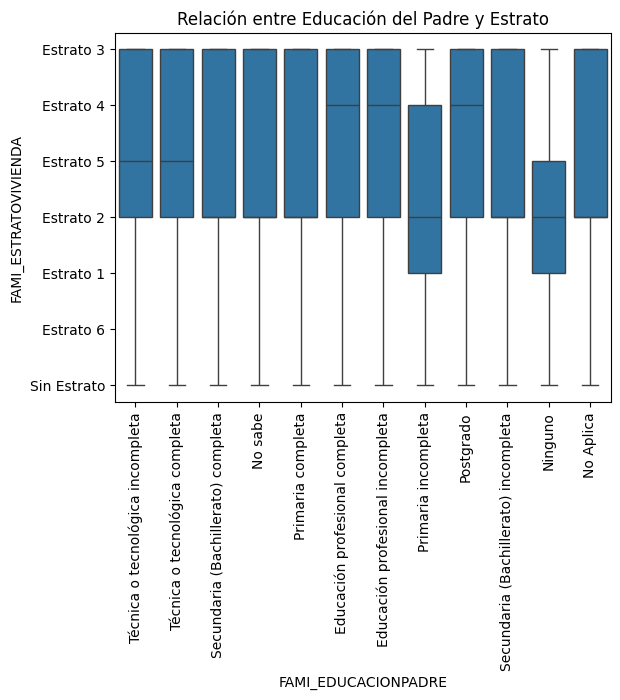

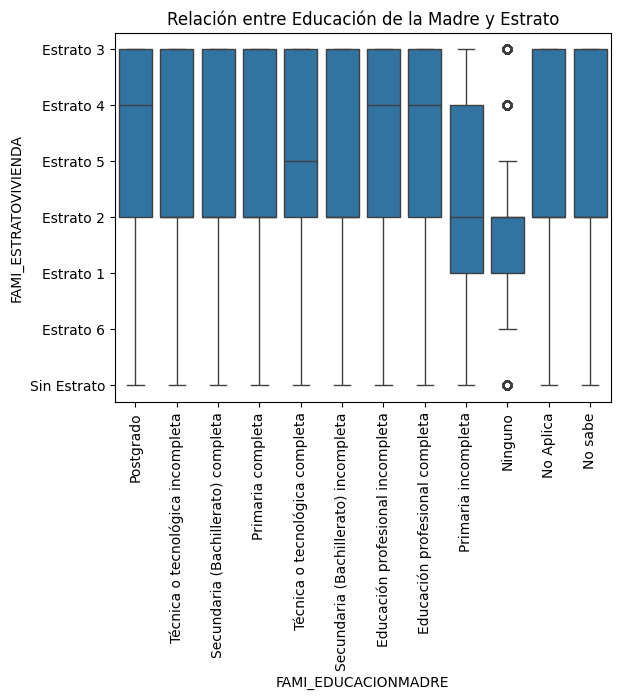

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FAMI_EDUCACIONPADRE', y='FAMI_ESTRATOVIVIENDA', data=df)
plt.title('Relación entre Educación del Padre y Estrato')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x='FAMI_EDUCACIONMADRE', y='FAMI_ESTRATOVIVIENDA', data=df)
plt.title('Relación entre Educación de la Madre y Estrato')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_ESTRATOVIVIENDA'], df['FAMI_TIENEINTERNET'].isnull())
print(crosstab)

FAMI_TIENEINTERNET     False  True 
FAMI_ESTRATOVIVIENDA               
Estrato 1             111724    267
Estrato 2             232222    449
Estrato 3             210287    398
Estrato 4              65345    169
Estrato 5              23512     96
Estrato 6              12543     62
Sin Estrato             3219     70


In [ ]:
import pandas as pd

crosstab_padre = pd.crosstab(df['FAMI_EDUCACIONPADRE'], df['FAMI_TIENEINTERNET'].isnull())
print(crosstab_padre)

crosstab_madre = pd.crosstab(df['FAMI_EDUCACIONMADRE'], df['FAMI_TIENEINTERNET'].isnull())
print(crosstab_madre)

FAMI_TIENEINTERNET                     False  True 
FAMI_EDUCACIONPADRE                                
Educación profesional completa         82487    630
Educación profesional incompleta       26775    309
Ninguno                                21664    344
No Aplica                               9162     67
No sabe                                16483    109
Postgrado                              43875    294
Primaria completa                      55441    517
Primaria incompleta                   124560   1115
Secundaria (Bachillerato) completa    127366    923
Secundaria (Bachillerato) incompleta   71102    552
Técnica o tecnológica completa         62581    414
Técnica o tecnológica incompleta       22320    232
FAMI_TIENEINTERNET                     False  True 
FAMI_EDUCACIONMADRE                                
Educación profesional completa         84794    532
Educación profesional incompleta       22285    185
Ninguno                                14291    192
No Aplica   

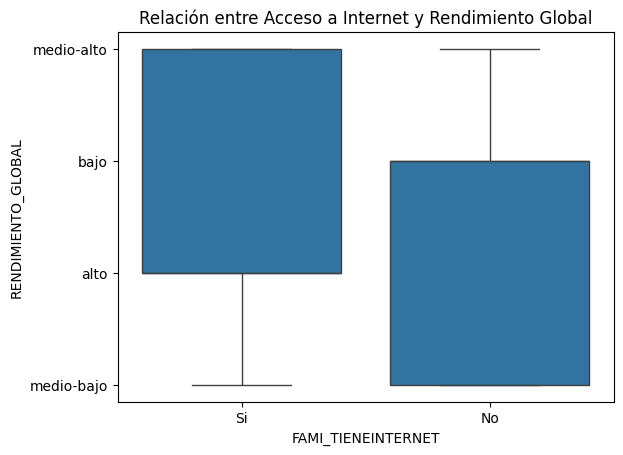

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FAMI_TIENEINTERNET', y='RENDIMIENTO_GLOBAL', data=df)  # O usar sns.violinplot
plt.title('Relación entre Acceso a Internet y Rendimiento Global')
plt.show()

In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_ESTRATOVIVIENDA'], df['FAMI_EDUCACIONPADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONPADRE    False  True 
FAMI_ESTRATOVIVIENDA               
Estrato 1             111642    349
Estrato 2             232018    653
Estrato 3             210101    584
Estrato 4              65372    142
Estrato 5              23553     55
Estrato 6              12592     13
Sin Estrato             3259     30


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_EDUCACIONMADRE'], df['FAMI_EDUCACIONPADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONPADRE                    False  True 
FAMI_EDUCACIONMADRE                                
Educación profesional completa         85220    106
Educación profesional incompleta       22368    102
Ninguno                                14399     84
No Aplica                               1909      9
No sabe                                 3013      4
Postgrado                              46197     49
Primaria completa                      56027     98
Primaria incompleta                    99192    228
Secundaria (Bachillerato) completa    141532    212
Secundaria (Bachillerato) incompleta   80897    115
Técnica o tecnológica completa         89410    132
Técnica o tecnológica incompleta       27477     56


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_TIENEINTERNET'], df['FAMI_EDUCACIONPADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONPADRE   False  True 
FAMI_TIENEINTERNET                
No                    72981    376
Si                   590835   1679


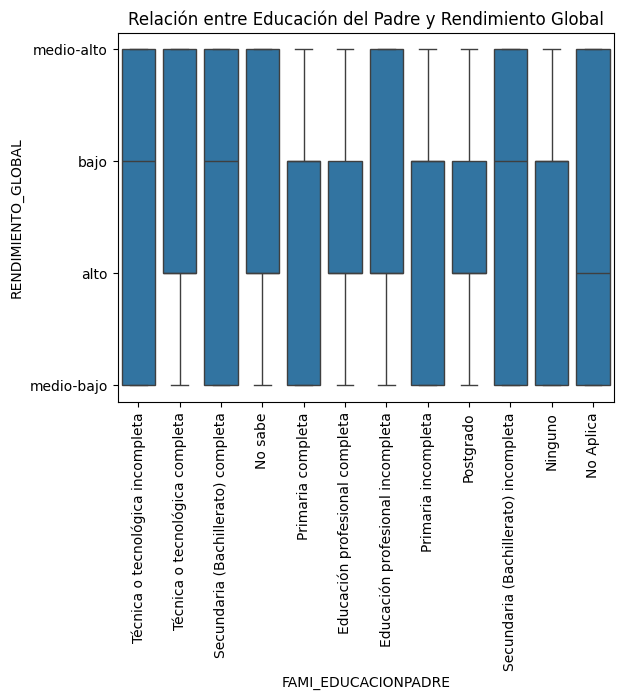

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FAMI_EDUCACIONPADRE', y='RENDIMIENTO_GLOBAL', data=df)  # O usar sns.violinplot
plt.title('Relación entre Educación del Padre y Rendimiento Global')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_ESTRATOVIVIENDA'], df['FAMI_EDUCACIONMADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONMADRE    False  True 
FAMI_ESTRATOVIVIENDA               
Estrato 1             111661    330
Estrato 2             232156    515
Estrato 3             210217    468
Estrato 4              65370    144
Estrato 5              23549     59
Estrato 6              12577     28
Sin Estrato             3247     42


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_EDUCACIONPADRE'], df['FAMI_EDUCACIONMADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONMADRE                    False  True 
FAMI_EDUCACIONPADRE                                
Educación profesional completa         82915    202
Educación profesional incompleta       26914    170
Ninguno                                21861    147
No Aplica                               9204     25
No sabe                                16555     37
Postgrado                              44099     70
Primaria completa                      55818    140
Primaria incompleta                   125389    286
Secundaria (Bachillerato) completa    128053    236
Secundaria (Bachillerato) incompleta   71521    133
Técnica o tecnológica completa         62839    156
Técnica o tecnológica incompleta       22473     79


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_TIENEINTERNET'], df['FAMI_EDUCACIONMADRE'].isnull())
print(crosstab)

FAMI_EDUCACIONMADRE   False  True 
FAMI_TIENEINTERNET                
No                    73002    355
Si                   591048   1466


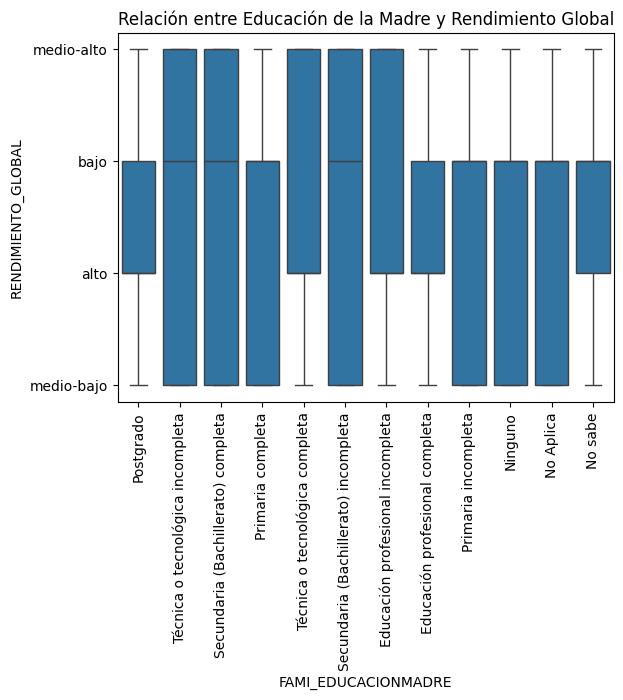

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='FAMI_EDUCACIONMADRE', y='RENDIMIENTO_GLOBAL', data=df)  # O usar sns.violinplot
plt.title('Relación entre Educación de la Madre y Rendimiento Global')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['FAMI_ESTRATOVIVIENDA'], df['ESTU_PAGOMATRICULAPROPIO'].isnull())
print(crosstab)

ESTU_PAGOMATRICULAPROPIO   False  True 
FAMI_ESTRATOVIVIENDA                   
Estrato 1                 111527    464
Estrato 2                 231514   1157
Estrato 3                 209146   1539
Estrato 4                  64741    773
Estrato 5                  23242    366
Estrato 6                  12308    297
Sin Estrato                 3126    163


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['ESTU_VALORMATRICULAUNIVERSIDAD'], df['ESTU_PAGOMATRICULAPROPIO'].isnull())
print(crosstab)

ESTU_PAGOMATRICULAPROPIO                   False  True 
ESTU_VALORMATRICULAUNIVERSIDAD                         
Entre 1 millón y menos de 2.5 millones    204000     48
Entre 2.5 millones y menos de 4 millones  127385     45
Entre 4 millones y menos de 5.5 millones   69718     18
Entre 5.5 millones y menos de 7 millones   38481      9
Entre 500 mil y menos de 1 millón          78674     30
Menos de 500 mil                           80237     26
Más de 7 millones                          67986     28
No pagó matrícula                          19521      7


In [ ]:
import pandas as pd

crosstab = pd.crosstab(df['ESTU_HORASSEMANATRABAJA'], df['ESTU_PAGOMATRICULAPROPIO'].isnull())
print(crosstab)

ESTU_PAGOMATRICULAPROPIO   False  True 
ESTU_HORASSEMANATRABAJA                
0                         115521   1029
Entre 11 y 20 horas       115044    813
Entre 21 y 30 horas        91987    706
Menos de 10 horas          86637    554
Más de 30 horas           247704   1648


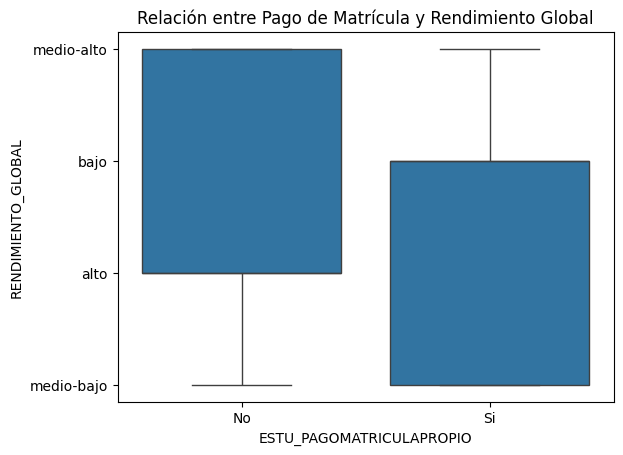

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='ESTU_PAGOMATRICULAPROPIO', y='RENDIMIENTO_GLOBAL', data=df)  # O usar sns.violinplot
plt.title('Relación entre Pago de Matrícula y Rendimiento Global')
plt.show()

Codificamos one-hot las variables categoricas pero que no tienen un orden jerarquico

In [ ]:
# Codificación one-hot para variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_VALORMATRICULAUNIVERSIDAD'], drop_first=True, dtype=int)

imputamos con el valor mas frecuente para las variables educacion padre y madre, para luego hacer una codificacion ordinal y darle la importancia a cada nivel academico alcanzado por los padres


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Crea un SimpleImputer con la estrategia deseada (ej., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent') # Elige la estrategia deseada

# Selecciona las columnas numéricas para la imputación
columns_imputer = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

# Aplica la imputación a las columnas seleccionadas
df[columns_imputer] = imputer.fit_transform(df[columns_imputer])

In [ ]:
import numpy as np
#codificacion ordinal educacion padre
educacion_mapping = {
    "Ninguno": 0,
    "No sabe": 1,
    "No Aplica": 2,
    "Primaria incompleta": 3,
    "Primaria completa": 4,
    "Secundaria (Bachillerato) incompleta": 5,
    "Secundaria (Bachillerato) completa": 6,
    "Técnica o tecnológica incompleta":7,
    "Técnica o tecnológica completa":8,
    "Educación profesional incompleta": 9,
    "Educación profesional completa": 10,
    "Postgrado": 11
}
df['FAMI_EDUCACIONPADRE_ORDINAL'] = df['FAMI_EDUCACIONPADRE'].map(educacion_mapping)

In [ ]:
#codificacion ordinal educacion madre
educacion_mapping = {
    "Ninguno": 0,
    "No sabe": 1,
    "No Aplica": 2,
    "Primaria incompleta": 3,
    "Primaria completa": 4,
    "Secundaria (Bachillerato) incompleta": 5,
    "Secundaria (Bachillerato) completa": 6,
    "Técnica o tecnológica incompleta":7,
    "Técnica o tecnológica completa":8,
    "Educación profesional incompleta": 9,
    "Educación profesional completa": 10,
    "Postgrado": 11
}
df['FAMI_EDUCACIONMADRE_ORDINAL'] = df['FAMI_EDUCACIONMADRE'].map(educacion_mapping)


In [ ]:
df = df.drop(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], axis=1)

In [ ]:
df.isnull().sum()

,0
ID,0
PERIODO,0
RENDIMIENTO_GLOBAL,0
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,0
ESTU_PRGM_ACADEMICO_ACUICULTURA,0
...,...
ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,0
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,0
ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,0
FAMI_EDUCACIONPADRE_ORDINAL,0


hacemos la imputacion por knn para las categorias con codificacion one hot

In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos (n_neighbors)

In [ ]:
import numpy as np # Import the numpy library and assign it the alias 'np'

# Asegúrate de que 'df' contenga solo las columnas numéricas antes de la imputación
columnas_numericas = df.select_dtypes(include=np.number).columns
df_imputed = imputer.fit_transform(df[columnas_numericas])

# Crea un nuevo DataFrame con los valores imputados
df_imputed = pd.DataFrame(df_imputed, columns=columnas_numericas, index=df.index)

# Reemplaza las columnas originales con las columnas imputadas
df[columnas_numericas] = df_imputed

In [ ]:
df.isnull().sum()
# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Columns: 1001 entries, ID to FAMI_EDUCACIONMADRE_ORDINAL
dtypes: float64(1000), object(1)
memory usage: 5.2+ GB


,ID,PERIODO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,...,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,FAMI_EDUCACIONPADRE_ORDINAL,FAMI_EDUCACIONMADRE_ORDINAL
0,904256.0,20212.0,medio-alto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,11.0
1,645256.0,20212.0,bajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0
2,308367.0,20203.0,bajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
3,470353.0,20195.0,alto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
4,989032.0,20212.0,medio-bajo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


None

In [ ]:
df['FAMI_EDUCACIONMADRE_ORDINAL'].unique()

array([11.,  7.,  6.,  4.,  8.,  5.,  9., 10.,  3.,  0.,  2.,  1.])

In [ ]:
# Codificación ordinal para 'RENDIMIENTO_GLOBAL'
rendimiento_mapping = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].map(rendimiento_mapping)

In [ ]:
df.isnull().sum()
# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Columns: 1001 entries, ID to FAMI_EDUCACIONMADRE_ORDINAL
dtypes: float64(1000), int64(1)
memory usage: 5.2 GB


,ID,PERIODO,RENDIMIENTO_GLOBAL,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,ESTU_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,ESTU_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,ESTU_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,ESTU_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,...,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,FAMI_EDUCACIONPADRE_ORDINAL,FAMI_EDUCACIONMADRE_ORDINAL
0,904256.0,20212.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,11.0
1,645256.0,20212.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0
2,308367.0,20203.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0
3,470353.0,20195.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
4,989032.0,20212.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


None

In [ ]:
# Verificar las primeras filas después del preprocesamiento
df.head()

# Verificar si quedan valores nulos
df.isnull().sum()

,0
ID,0
PERIODO,0
RENDIMIENTO_GLOBAL,0
ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,0
ESTU_PRGM_ACADEMICO_ACUICULTURA,0
...,...
ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,0
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones,0
ESTU_VALORMATRICULAUNIVERSIDAD_No pagó matrícula,0
FAMI_EDUCACIONPADRE_ORDINAL,0


creamos el modelo de aprenizaje xgboost

In [ ]:
!pip install lightgbm

In [ ]:
!pip install xgboost

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

In [ ]:
X = df.drop(columns=['RENDIMIENTO_GLOBAL'])  # Características
y = df['RENDIMIENTO_GLOBAL']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
# Antes de crear el conjunto de datos LightGBM, reemplaza los caracteres especiales en los nombres de columna:
X_train.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in X_test.columns]

In [ ]:
# Crea una función para limpiar los nombres de las columnas y asegurar la unicidad
def limpiar_nombres_columnas(df):
  """
  Limpia los nombres de las columnas reemplazando caracteres especiales y asegurando la unicidad.

  Args:
    df: Pandas DataFrame

  Returns:
    Pandas DataFrame con nombres de columnas limpios.
  """
  vistos = set()
  nuevas_columnas = []
  for col in df.columns:
    nueva_col = re.sub(r'[^a-zA-Z0-9_]', '_', col)
    # Agrega un contador para asegurar la unicidad si el nombre de la columna se repite
    contador = 1
    while nueva_col in vistos:
      nueva_col = f"{nueva_col}_{contador}"
      contador += 1
    nuevas_columnas.append(nueva_col)
    vistos.add(nueva_col)
  df.columns = nuevas_columnas
  return df

# Aplica la función a los datos de entrenamiento y prueba
X_train = limpiar_nombres_columnas(X_train)
X_test = limpiar_nombres_columnas(X_test)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'multiclass',
    'num_class': 4,  # Número de clases en 'RENDIMIENTO_GLOBAL'
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# 2. Crear el modelo de XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Para clasificación multiclase
    num_class=4,                # Número de clases (bajo, medio-bajo, medio-alto, alto)
    n_estimators=600,           # Número de árboles
    learning_rate=0.1,          # Tasa de aprendizaje
    max_depth=6,                # Profundidad máxima de los árboles
    random_state=42
)

In [ ]:
# 3. Entrenar el modelo
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [ ]:
# 4. Predecir en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [ ]:
# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4351913357400722


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ROC AUC Score (One-vs-Rest)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.7048940015163982


preprocesamos el archivo test

In [ ]:
import pandas as pd

df = pd.read_csv('/content/udea-ai4eng-20242/test.csv')

# Muestra las primeras filas del DataFrame
from IPython.display import display

display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      296786 non-null  int64 
 1   ID                              296786 non-null  int64 
 2   PERIODO                         296786 non-null  int64 
 3   ESTU_PRGM_ACADEMICO             296786 non-null  object
 4   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 5   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 6   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 7   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 8   FAMI_TIENEINTERNET              285247 non-null  object
 9   FAMI_EDUCACIONPADRE             286793 non-null  object
 10  FAMI_EDUCACIONMADRE             286563 non-null  object
 11  ESTU_PAGOMATRICULAPROPIO        293979 non-null  object
dtypes: int64(3), object(9)
memory 

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No


None

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,2723
ESTU_HORASSEMANATRABAJA,13379
FAMI_ESTRATOVIVIENDA,13795
FAMI_TIENEINTERNET,11539
FAMI_EDUCACIONPADRE,9993


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Crea un SimpleImputer con la estrategia deseada (ej., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='most_frequent') # Elige la estrategia deseada

# Selecciona las columnas numéricas para la imputación
columns_imputer = ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']

# Aplica la imputación a las columnas seleccionadas
df[columns_imputer] = imputer.fit_transform(df[columns_imputer])

In [ ]:
import numpy as np
#codificacion ordinal educacion padre
educacion_mapping = {
    "Ninguno": 0,
    "No sabe": 1,
    "No Aplica": 2,
    "Primaria incompleta": 3,
    "Primaria completa": 4,
    "Secundaria (Bachillerato) incompleta": 5,
    "Secundaria (Bachillerato) completa": 6,
    "Técnica o tecnológica incompleta":7,
    "Técnica o tecnológica completa":8,
    "Educación profesional incompleta": 9,
    "Educación profesional completa": 10,
    "Postgrado": 11
}
df['FAMI_EDUCACIONPADRE_ORDINAL'] = df['FAMI_EDUCACIONPADRE'].map(educacion_mapping)

In [ ]:
#codificacion ordinal educacion madre
educacion_mapping = {
    "Ninguno": 0,
    "No sabe": 1,
    "No Aplica": 2,
    "Primaria incompleta": 3,
    "Primaria completa": 4,
    "Secundaria (Bachillerato) incompleta": 5,
    "Secundaria (Bachillerato) completa": 6,
    "Técnica o tecnológica incompleta":7,
    "Técnica o tecnológica completa":8,
    "Educación profesional incompleta": 9,
    "Educación profesional completa": 10,
    "Postgrado": 11
}
df['FAMI_EDUCACIONMADRE_ORDINAL'] = df['FAMI_EDUCACIONMADRE'].map(educacion_mapping)

In [ ]:
df = df.drop(['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], axis=1)

In [ ]:
# Codificación one-hot para variables categóricas
df = pd.get_dummies(df, columns=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'ESTU_VALORMATRICULAUNIVERSIDAD'], drop_first=True, dtype=int)

In [ ]:
import numpy as np # Import the numpy library and assign it the alias 'np'

# Asegúrate de que 'df' contenga solo las columnas numéricas antes de la imputación
columnas_numericas = df.select_dtypes(include=np.number).columns
df_imputed = imputer.fit_transform(df[columnas_numericas])

# Crea un nuevo DataFrame con los valores imputados
df_imputed = pd.DataFrame(df_imputed, columns=columnas_numericas, index=df.index)

# Reemplaza las columnas originales con las columnas imputadas
df[columnas_numericas] = df_imputed

In [ ]:
# Obtener las columnas faltantes en df en comparación con X_train
missing_cols = set(X_train.columns) - set(df.columns)

# Agregar las columnas faltantes a df con valor 0
for col in missing_cols:
    df[col] = 0

# Asegurar que df tenga las mismas columnas que X_train, en el mismo orden
df = df[X_train.columns]

# Realizar las predicciones en el conjunto de prueba preprocesado
y_pred_test = xgb_model.predict(df)

# Crear un DataFrame con las predicciones
submission = pd.DataFrame({
    'ID': df['ID'],  # Asegúrate de que 'ID' esté en el conjunto de prueba original
    'Desempeño': y_pred_test
})

# Guardar el archivo CSV para Kaggle
submission.to_csv('submission.csv', index=False)

print("Archivo de submission creado correctamente.")



<ipython-input-146-93dafb799630>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-146-93dafb799630>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-146-93dafb799630>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0
<ipython-input-146-

Archivo de submission creado correctamente.


In [ ]:
# Supongamos que el modelo predice los valores 0, 1, 2, 3
# Los mapeamos a las etiquetas correspondientes
predicciones_map = {
    0: 'bajo',
    1: 'medio bajo',
    2: 'medio alto',
    3: 'alto'
}

# Convertir las predicciones numéricas a las etiquetas de desempeño
# Convertir y_pred_test a pandas.Series antes de usar map
submission['Desempeño'] = pd.Series(y_pred_test).map(predicciones_map)

# Guardar el archivo de submission corregido
submission.to_csv('submission.csv', index=False)

print("Archivo de submission con etiquetas creado correctamente.")


Archivo de submission con etiquetas creado correctamente.


In [ ]:
import pandas as pd

# Cargar el archivo submission.csv en un DataFrame
submission = pd.read_csv('submission.csv')

# Mostrar las primeras filas del archivo
print(submission.head())


       ID   Desempeño
0  550236        bajo
1   98545  medio alto
2  499179        alto
3  782980        bajo
4  785185        bajo


In [ ]:
from google.colab import files

# Descarga el archivo de submisión
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>